In [ ]:
!pip install -q yfinance
!pip install pandas-datareader
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# For reading stock data from yahoo
yf.pdr_override()
# For time stamps
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

# The tech stocks we'll use for this analysis
tech_list = ['SHOP', 'COST', 'WMT', 'CP', 'AQN','TM']

# Set up End and Start times for data grab
tech_list = ['SHOP', 'COST', 'WMT', 'CP', 'AQN','TM']

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [SHOP, COST, WMT, CP, AQN, TM]
company_name = ["SHOPIFY", "COSTCO WHOLESALE", "WALMART", "CANADIAN PACIFIC RAILWAY", "ALGONQUIN POWER ANDTILITIES", "TOYOTA MOTORS"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2015-05-20,1.700000,1.700000,1.700000,1.700000,1.700000,0,SHOPIFY
2015-05-21,2.800000,2.874000,2.411000,2.568000,2.568000,123039000,SHOPIFY
2015-05-22,2.607000,3.110000,2.600000,2.831000,2.831000,28412000,SHOPIFY
2015-05-26,2.980000,3.034000,2.908000,2.965000,2.965000,8202000,SHOPIFY
2015-05-27,3.067000,3.081000,2.700000,2.750000,2.750000,7976000,SHOPIFY
...,...,...,...,...,...,...,...
2023-04-04,143.039993,143.050003,141.669998,142.139999,142.139999,349200,TOYOTA MOTORS
2023-04-05,140.550003,141.190002,140.169998,140.419998,140.419998,220500,TOYOTA MOTORS
2023-04-06,139.190002,139.369995,138.210007,138.869995,138.869995,224000,TOYOTA MOTORS


In [3]:
df.duplicated().sum()

7

In [4]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64

In [5]:
df.nunique()

Open            10347
High            10487
Low             10499
Close           10672
Adj Close       13446
Volume          12135
company_name        6
dtype: int64

In [6]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,1.457200e+04
mean,99.341550,100.208396,98.459815,99.360227,94.639738,5.036114e+06
std,101.806126,102.759853,100.862667,101.854694,100.302027,8.402817e+06
min,1.700000,1.700000,1.700000,1.700000,1.700000,0.000000e+00
25%,25.050000,25.377000,24.825999,25.133501,23.210444,3.901250e+05
50%,77.580002,78.120003,76.973251,77.564999,72.024570,2.247250e+06
75%,135.000000,135.872498,133.913754,134.889999,129.215004,6.176325e+06
max,607.280029,612.270020,597.729980,608.049988,603.873047,2.089590e+08


In [7]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14572 entries, 2015-05-20 to 2023-04-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          14572 non-null  float64
 1   High          14572 non-null  float64
 2   Low           14572 non-null  float64
 3   Close         14572 non-null  float64
 4   Adj Close     14572 non-null  float64
 5   Volume        14572 non-null  int64  
 6   company_name  14572 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 910.8+ KB


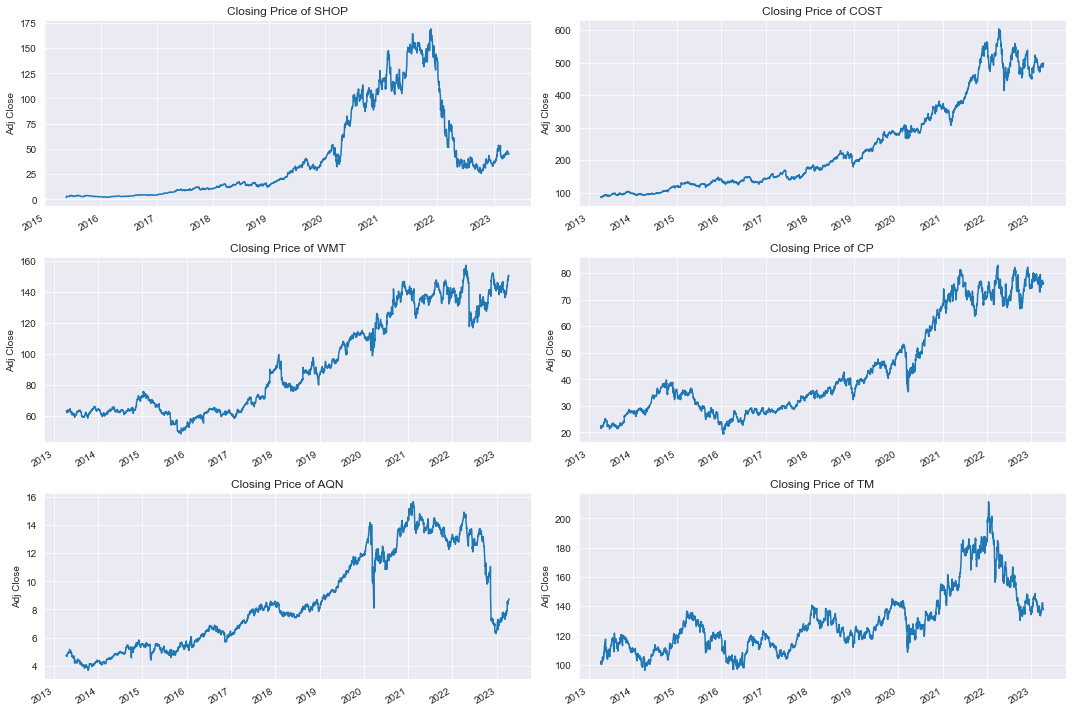

In [8]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

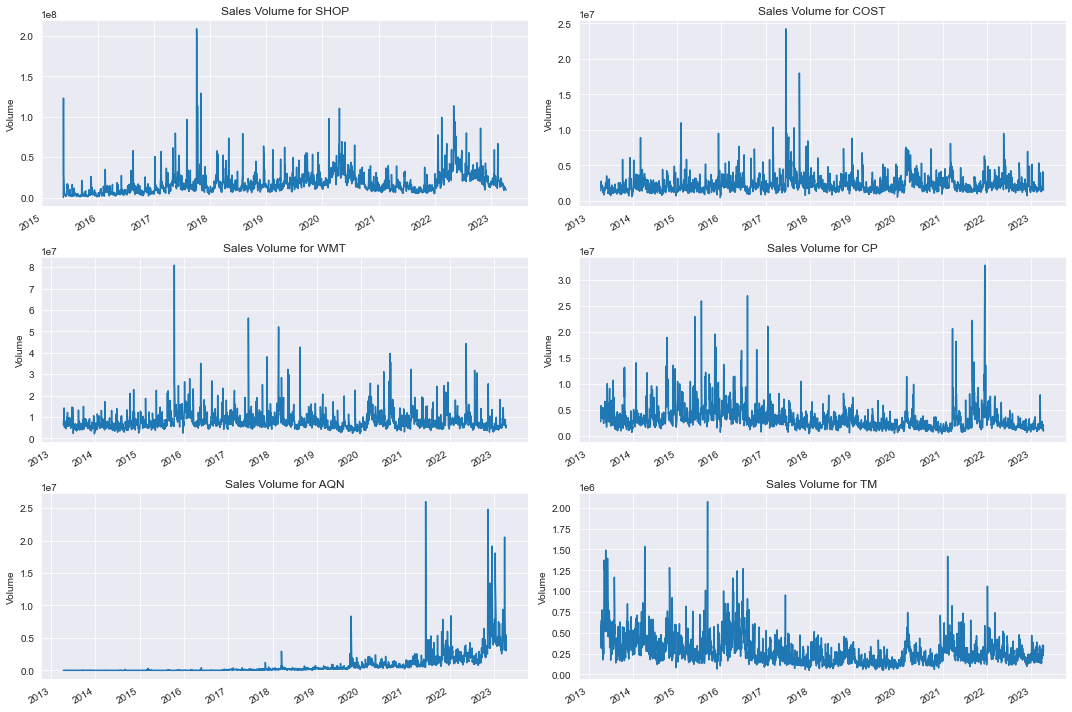

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

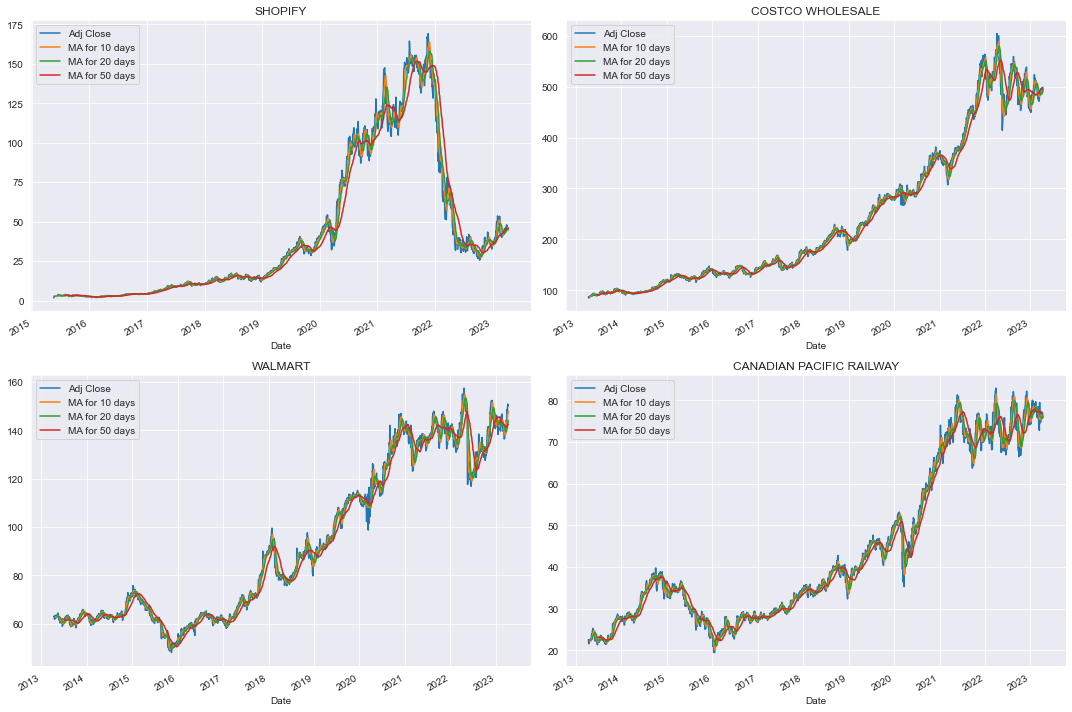

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SHOP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('SHOPIFY')

COST[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('COSTCO WHOLESALE')

WMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('WALMART')

CP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('CANADIAN PACIFIC RAILWAY')

fig.tight_layout()


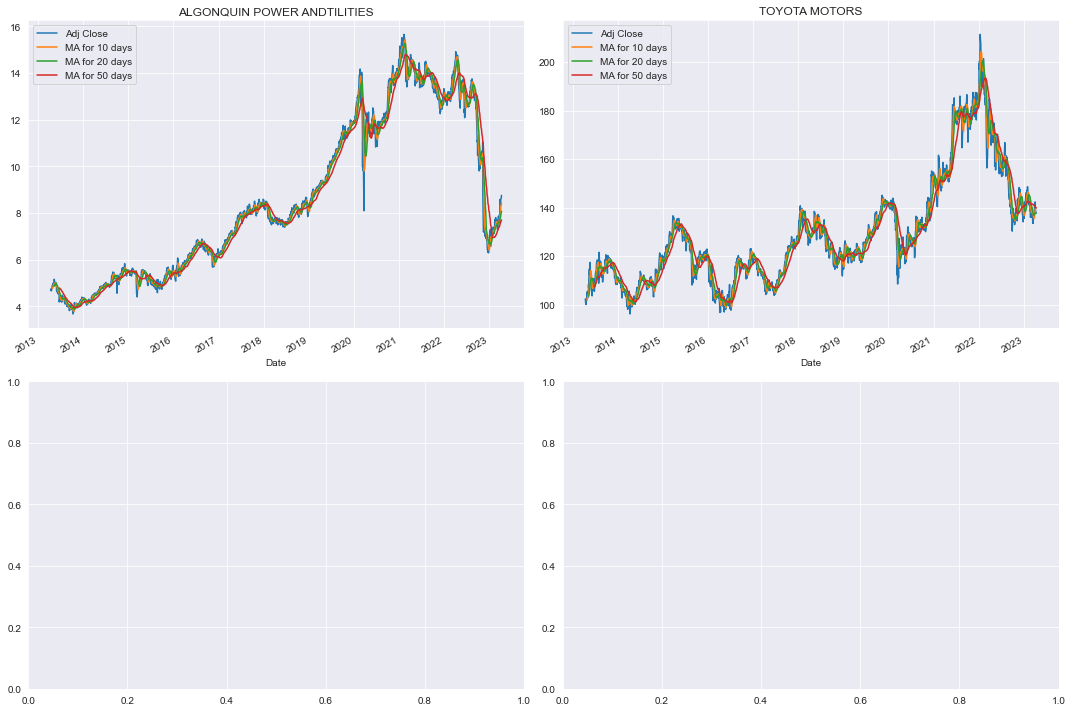

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AQN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ALGONQUIN POWER ANDTILITIES')

TM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TOYOTA MOTORS')

fig.tight_layout()

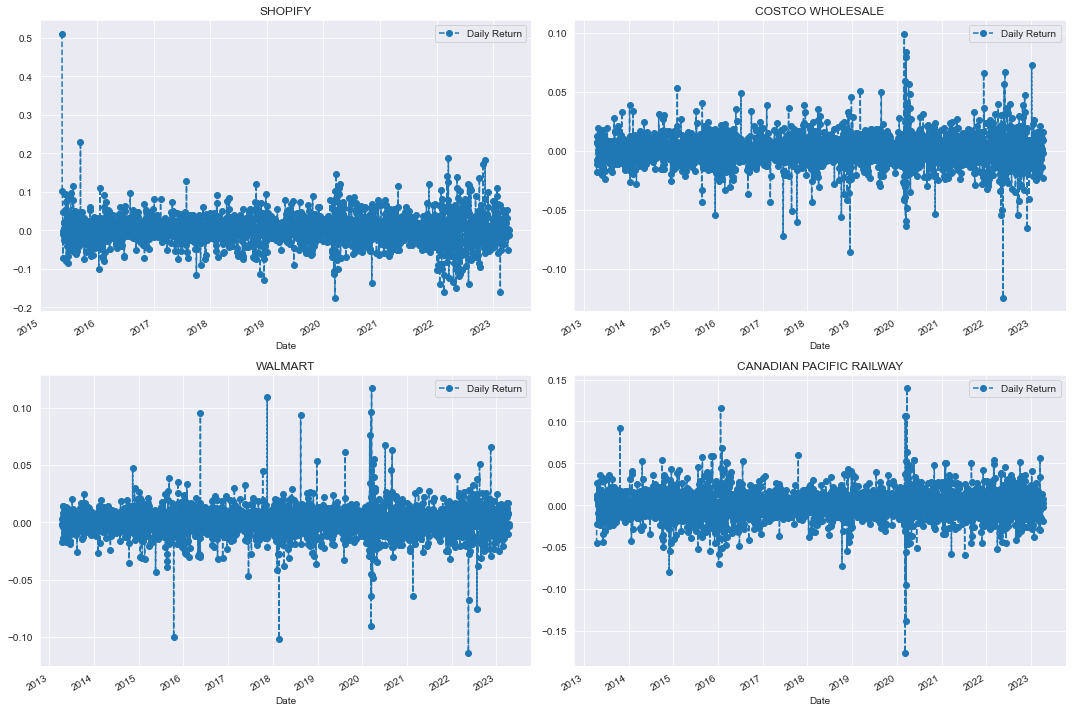

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SHOP['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('SHOPIFY')

COST['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('COSTCO WHOLESALE')

WMT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('WALMART')

CP['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('CANADIAN PACIFIC RAILWAY')

fig.tight_layout()

Text(0.5, 1.0, 'TOYOTA MOTORS')

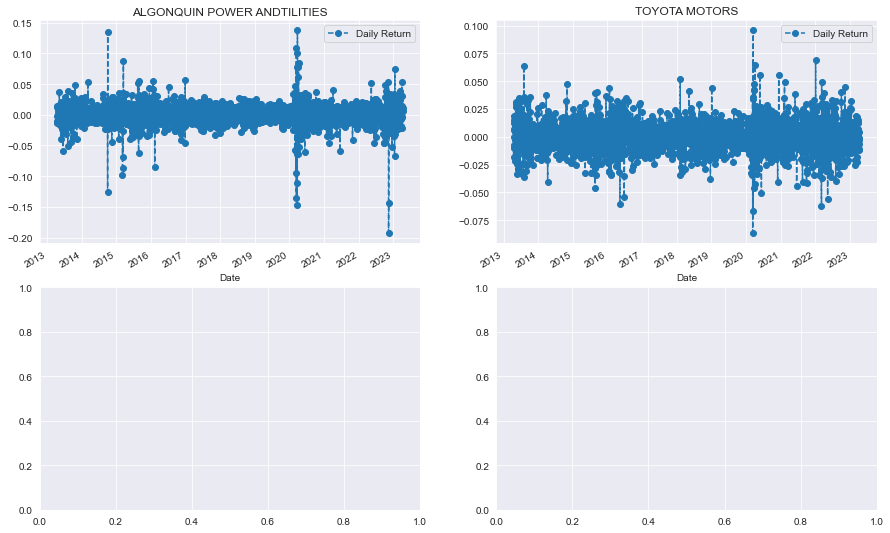

In [13]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AQN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ALGONQUIN POWER ANDTILITIES')

TM['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TOYOTA MOTORS')

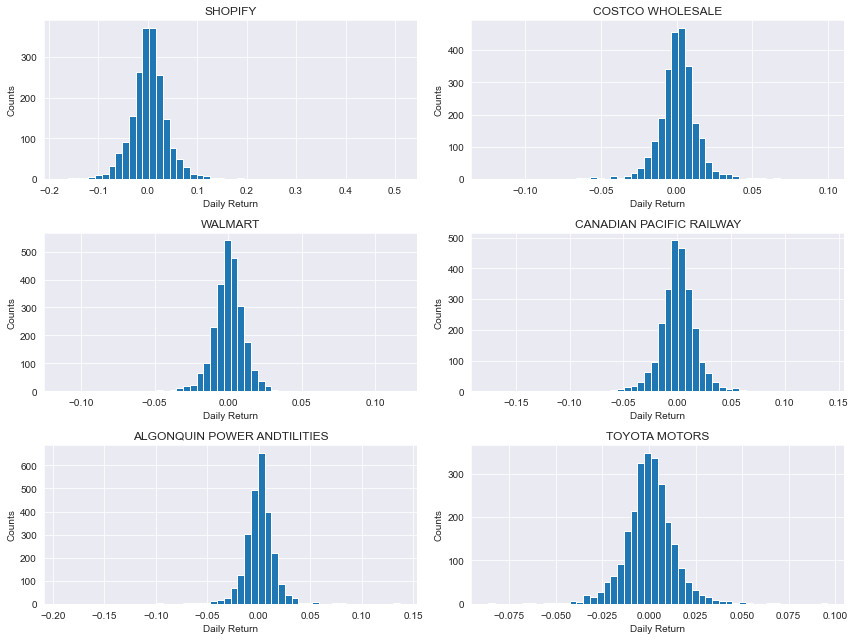

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets

[*********************100%***********************]  6 of 6 completed


,AQN,COST,CP,SHOP,TM,WMT
Date,,,,,,
2013-04-12,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-15,-0.013333,-0.018091,-0.045462,NaN,-0.017772,-0.001145
2013-04-16,0.013514,0.012859,0.026394,NaN,0.012782,0.002675
2013-04-17,-0.010667,-0.007390,-0.022501,NaN,-0.007555,-0.002161
2013-04-18,-0.002695,-0.011072,0.007673,NaN,-0.009941,-0.017195
...,...,...,...,...,...,...
2023-04-04,0.004779,0.001408,-0.000388,-0.001888,-0.001405,-0.009819
2023-04-05,0.014269,-0.001205,-0.018526,-0.050431,-0.012101,0.016573
2023-04-06,0.009379,-0.022429,0.002508,0.003541,-0.011038,0.007550


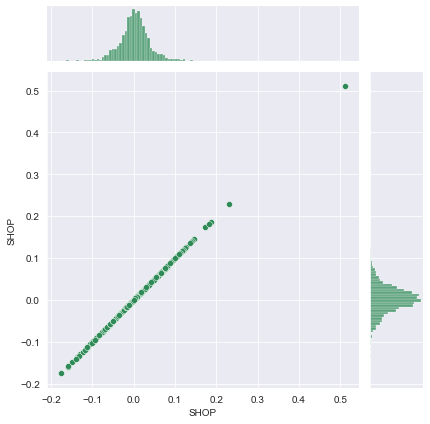

In [16]:
sns.jointplot(x='SHOP', y='SHOP', data=tech_rets, kind='scatter', color='seagreen')

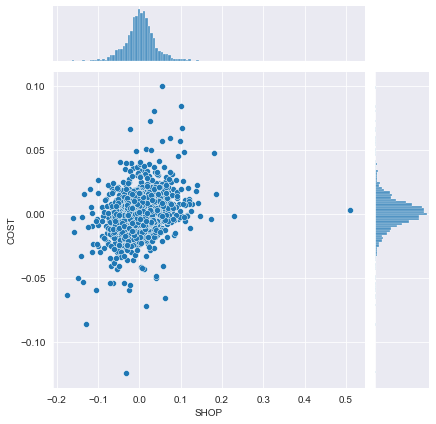

In [17]:
# We'll use joinplot to compare the daily returns of Shopify and Costco Wholesale
sns.jointplot(x='SHOP', y='COST', data=tech_rets, kind='scatter')

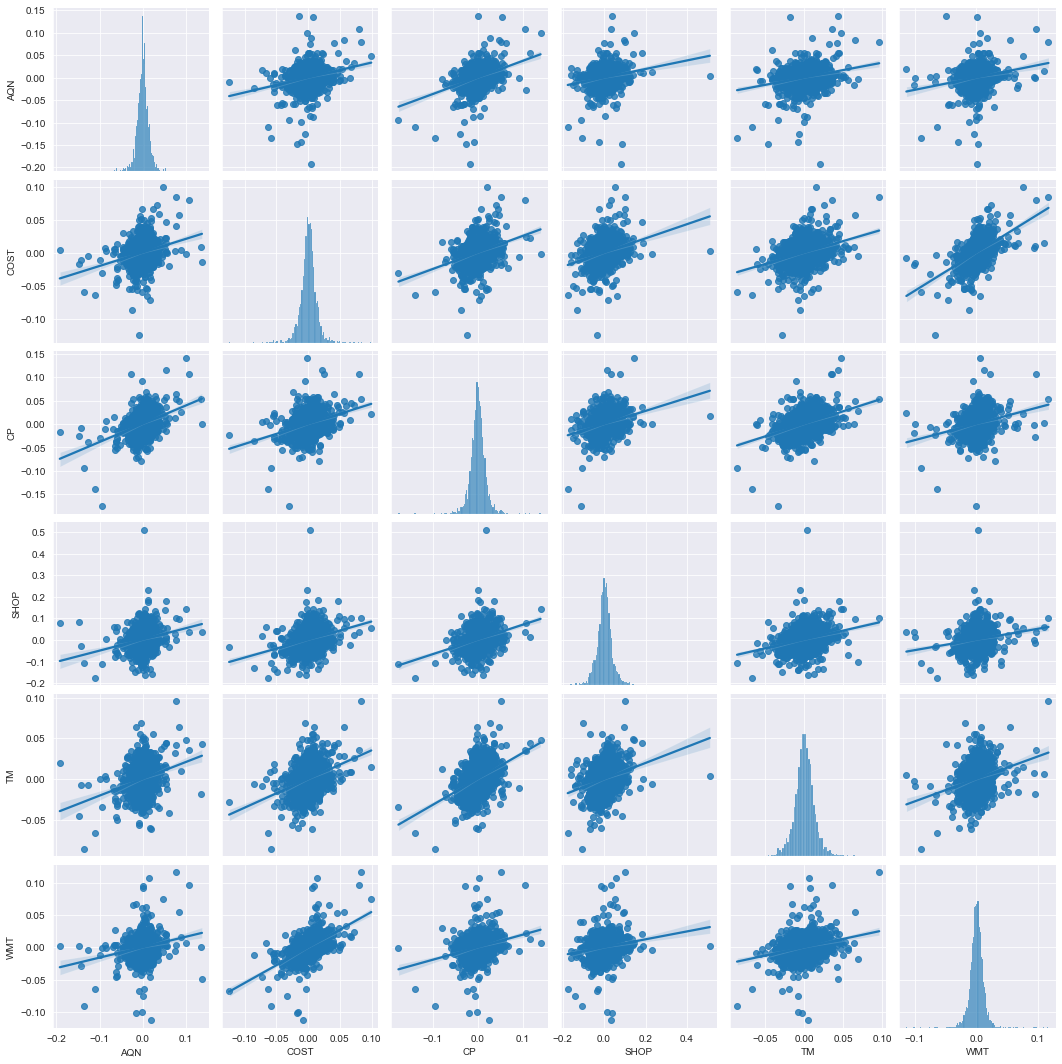

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

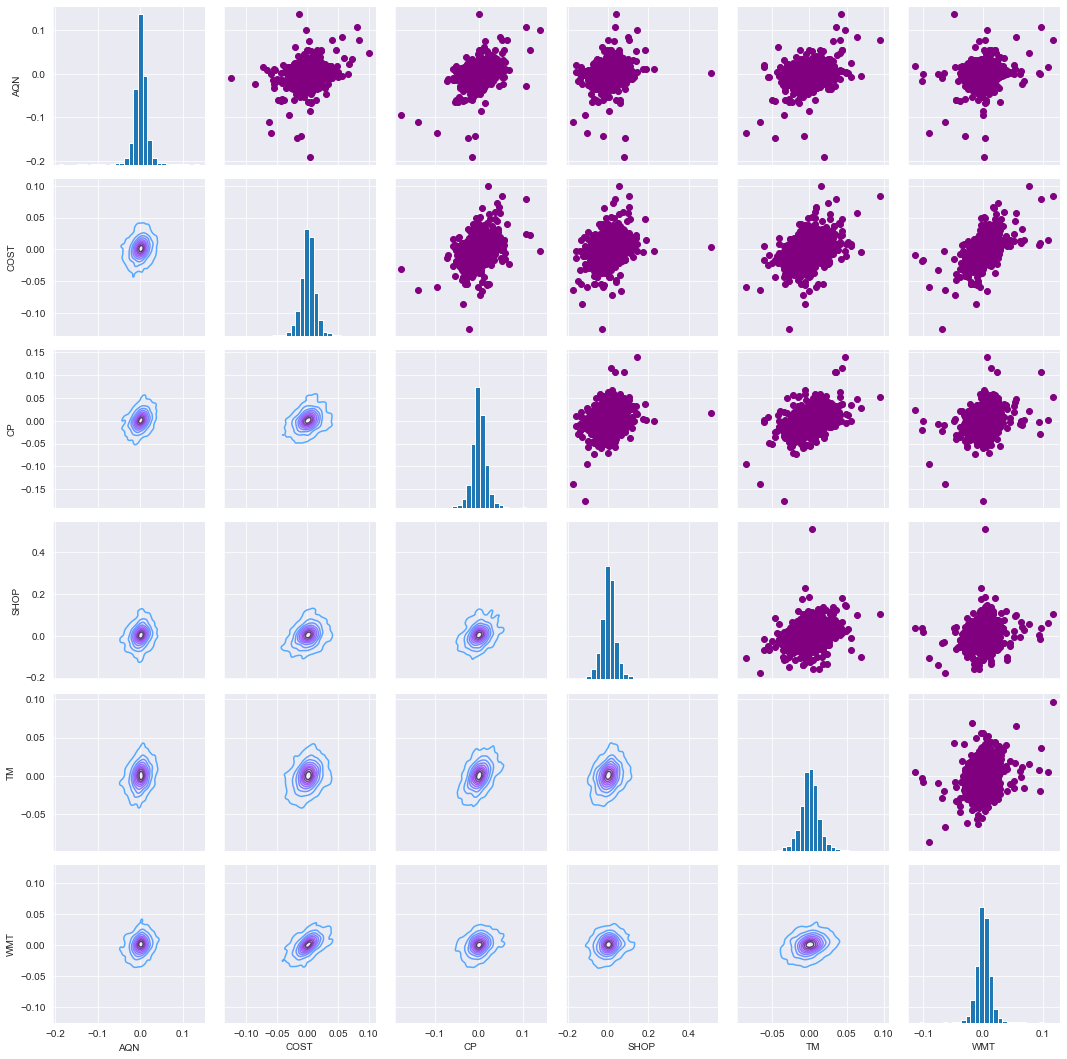

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)  or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

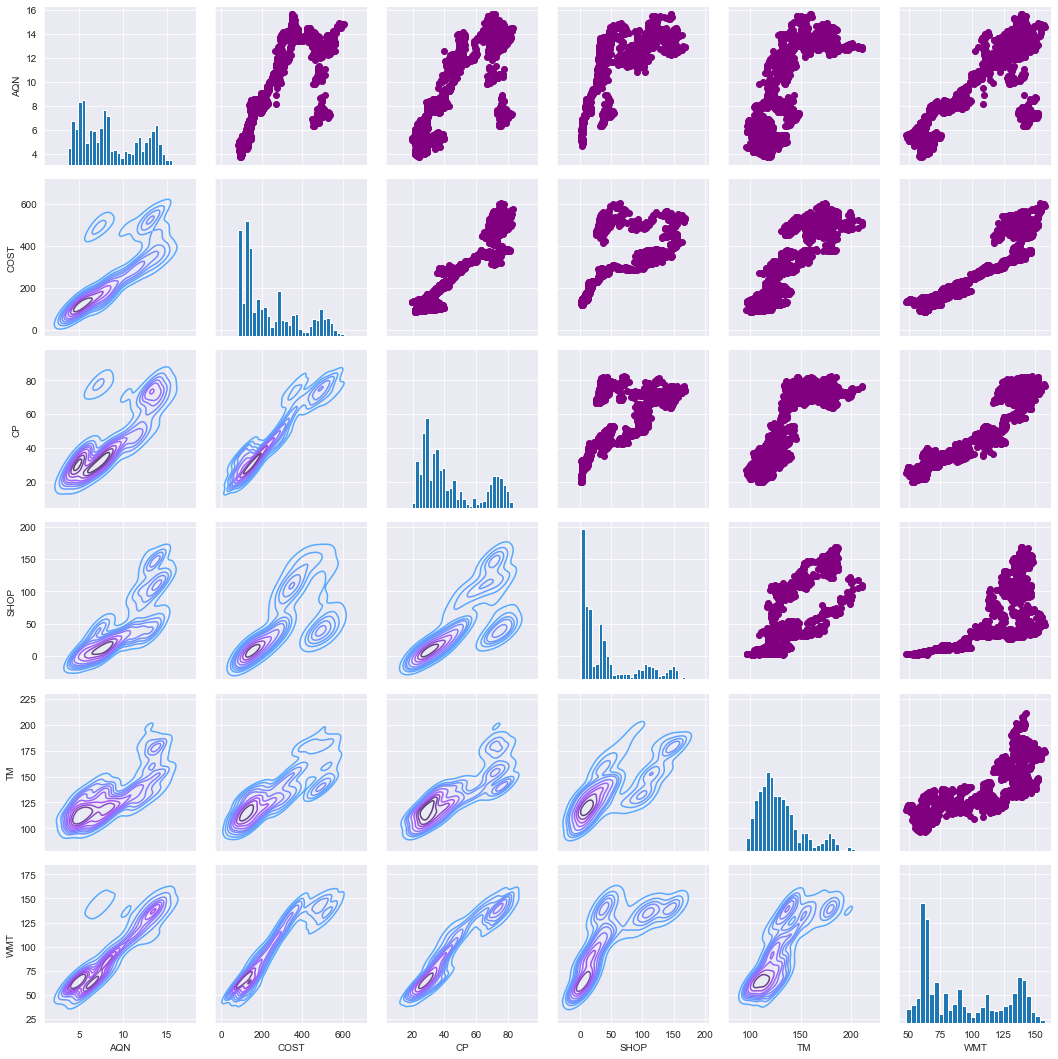

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

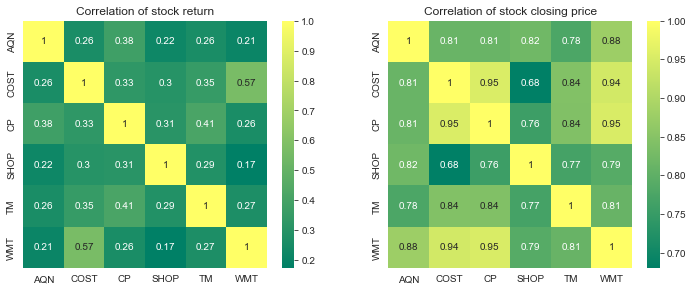

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

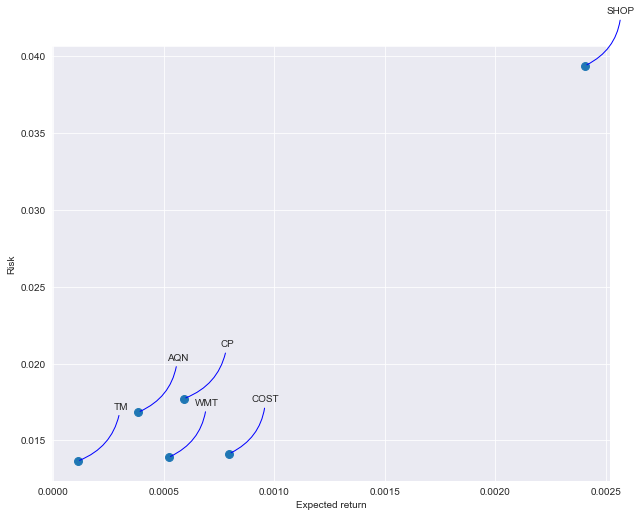

In [22]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))